### Código LEC5 2024-2

Grupo A 

In [ ]:
# Importación de librerías:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
rng = np.random.default_rng(0)

3.1 a) Explique detalladamente la estimación de estadísticos utilizando el método Bootstrap

La estimación de estadísticos utilizando el método bootstrap se basa en escoger una muestra del mismo tamaño de la muestra original de manera aleatoria, dependiendo del estadístico que queramos estimar calculamos correspondientemente, en el caso de la media: tomariamos nuestra muestra nueva y le calcularíamos a cada una de estas muestras su media generando un arreglo de datos nuevos usando bootstrap por $n$ iteraciones, finalmente al haber calculado todas las iteraciones se calcula la media y este sería nuestro estadístico estimado por el método bootstrap.

Cabe destacar que Bootstrap nos permite encontrar los intervalos de confianza de una manera mucho más eficiente, debido a que si tomamos los percentiles 2,5% y 97,5% son nuestros límites inferior y superior para todo estadístico

3.1 b) Plantee una función en Python la que permita estimar un estadistico $X$ con n remuestreos bootstrap

In [62]:
# Estima el estadístico: Media
def estimacion_media_bootstrap(data, n_muestreos):
    medias = []
    for i in range(n_muestreos):
        muestra = rng.choice(data, size=len(data), replace=True) 
        medias.append(np.mean(muestra)) 
        
    mean_medias = np.mean(medias)    
    return mean_medias, medias

# Estima el estadístico: Desviación estándar
def estimacion_dv_bootstrap(data, n_muestreos):
    dv = []
    for i in range(n_muestreos):
        muestra = rng.choice(data, size=len(data), replace=True) 
        dv.append(np.std(muestra)) 
        
    mean_dv = np.mean(dv)
    return mean_dv, dv

3.1 c) Estime la media de la población en relación a body_mass_g y sex (estimar para macho y hembra por separado) usando Bootstrap sobre los datos de la especie de pingüino escogida. Utilice $10^4$ remuestreos Bootstrap.

Las especies de pingüinos son "Adelie", "Chinstrap" y "Gentoo", se elegirá la especie de "Chinstrap"

In [63]:
# Importación de los datos
df = pd.read_csv("penguins_size.csv")

In [64]:
# Masa corporal de los pingüinos por sexo
body_mass_g_m = df[(df['species'] == 'Chinstrap') & (df['sex'] == 'MALE')]['body_mass_g']
body_mass_g_f = df[(df['species'] == 'Chinstrap') & (df['sex'] == 'FEMALE')]['body_mass_g']

# Estimación de la media de la masa corporal de los pingüinos machos
media_m = estimacion_media_bootstrap(body_mass_g_m, 10000)

# Estimación de la media de la masa corporal de los pingüinos hembras
media_f = estimacion_media_bootstrap(body_mass_g_f, 10000)

print(f"Estimación de la media de la masa corporal de los pingüinos machos: {media_m[0]:.2f}")
print(f"Estimación de la media de la masa corporal de los pingüinos hembras: {media_f[0]:.2f}")


Estimación de la media de la masa corporal de los pingüinos machos: 3939.17
Estimación de la media de la masa corporal de los pingüinos hembras: 3527.54


3.1 d) Estime la desviación estándar de la población de cada uno usando Bootstrap sobre la especie de pingüino escogida. Utilice $10^4$ remuestreos Bootstrap

In [65]:
# Masa corporal de los pingüinos por sexo
body_mass_g_m = df[(df['species'] == 'Chinstrap') & (df['sex'] == 'MALE')]['body_mass_g']
body_mass_g_f = df[(df['species'] == 'Chinstrap') & (df['sex'] == 'FEMALE')]['body_mass_g']

# Estimación de la dv de la masa corporal de los pingüinos machos
dv_m = estimacion_dv_bootstrap(body_mass_g_m, 10000)

# Estimación de la dv de la masa corporal de los pingüinos hembras
dv_f = estimacion_dv_bootstrap(body_mass_g_f, 10000)

print(f"Estimación de la desviación estándar a de la masa corporal de los pingüinos machos: {dv_m[0]:.2f}")
print(f"Estimación de la desviación estándar de la masa corporal de los pingüinos hembras: {dv_f[0]:.2f}")


Estimación de la desviación estándar a de la masa corporal de los pingüinos machos: 349.41
Estimación de la desviación estándar de la masa corporal de los pingüinos hembras: 273.74


3.1 e) Grafique cómo se distribuye los remuestreos Bootstrap en ambos casos, para cada estadístico por separado

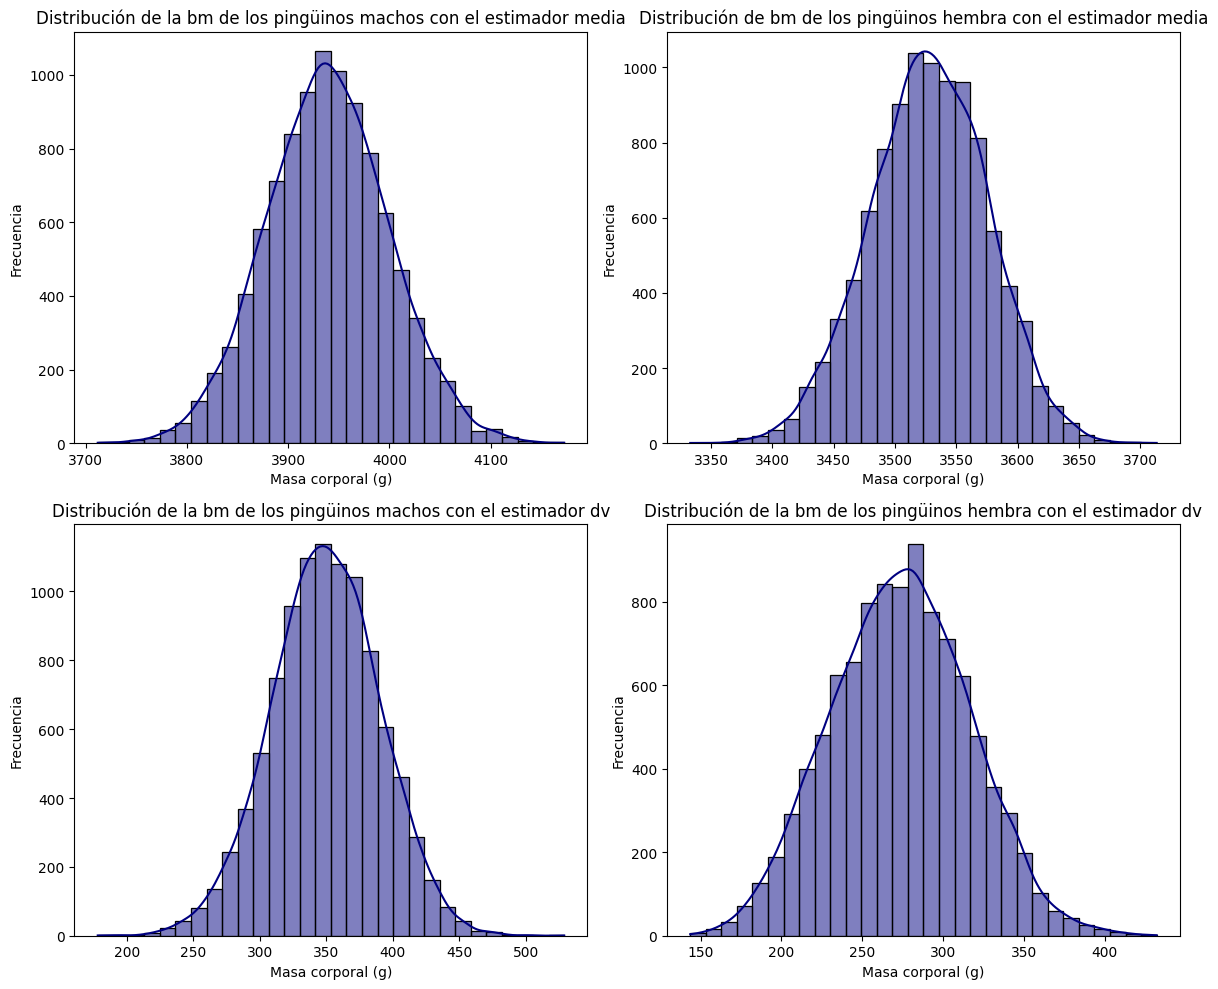

In [66]:
# Graficos de la distribución de la masa corporal estimada por bootstrap de los pingüinos machos y hembras
plt.figure(figsize=(12, 10))

# Distribución de la masa corporal de los pingüinos machos con el estimador media
plt.subplot(2, 2, 1)
sns.histplot(media_m[1], kde=True, color='navy', bins=30)
plt.title('Distribución de la bm de los pingüinos machos con el estimador media')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

# Distribución de la masa corporal de los pingüinos hembra con el estimador media
plt.subplot(2, 2, 2)
sns.histplot(media_f[1], kde=True, color='navy', bins=30)
plt.title('Distribución de bm de los pingüinos hembra con el estimador media')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

# Distribución de la masa corporal de los pingüinos machos con el estimador dv
plt.subplot(2, 2, 3)
sns.histplot(dv_m[1], kde=True, color='navy', bins=30)
plt.title('Distribución de la bm de los pingüinos machos con el estimador dv')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

# Distribución de la masa corporal de los pingüinos hembra con el estimador dv
plt.subplot(2, 2, 4)
sns.histplot(dv_f[1], kde=True, color='navy', bins=30)
plt.title('Distribución de la bm de los pingüinos hembra con el estimador dv')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

3.1 f) Obtenga un intervalo de confianza del 95% para cada estimador, a partir de los datos ya obtenidos. Repita los gráficos anteriores agregando este intervalo. También incluya los valores de cada estadístico de la muestra original como referencia

Dado que Bootstrap nos permite encontrar directamente los intervalos de confianza para los estimadores, solo calcularemos los percentiles $2.5\%$ y $97,5\%$ respectivamente quedandonos con un intervalo del 95% de confianza

In [59]:
# Cálculos muestra original

# Media
bm_o_m = np.mean(body_mass_g_m)
bm_o_f = np.mean(body_mass_g_f)

print(f"Media original de la masa corporal de los pingüinos machos: {bm_o_m:.2f}")	
print(f"Media original de la masa corporal de los pingüinos hembras: {bm_o_f:.2f}")


print("\n")
#Desviación Estándar
dv_o_m = np.std(body_mass_g_m)
dv_o_f = np.std(body_mass_g_f)

print(f"Desviación estándar original de la masa corporal de los pingüinos machos: {dv_o_m:.2f}")
print(f"Desviación estándar original de la masa corporal de los pingüinos hembras: {dv_o_f:.2f}")

Media original de la masa corporal de los pingüinos machos: 3938.97
Media original de la masa corporal de los pingüinos hembras: 3527.21


Desviación estándar original de la masa corporal de los pingüinos machos: 356.77
Desviación estándar original de la masa corporal de los pingüinos hembras: 281.11


In [60]:
# Cálculo percentiles
# Media
# Percentiles 2.5%
limite_inf_m = np.percentile(media_m[1], 2.5)
limite_inf_f = np.percentile(media_f[1], 2.5)

# Percentiles 97.5%
limite_sup_m = np.percentile(media_m[1], 97.5)
limite_sup_f = np.percentile(media_f[1], 97.5)

print(f"Intervalo de confianza del 95% de la masa corporal de los pingüinos machos usando la media: ({limite_inf_m:.2f}, {limite_sup_m:.2f})")
print(f"Intervalo de confianza del 95% de la masa corporal de los pingüinos hembras usando la media: ({limite_inf_f:.2f}, {limite_sup_f:.2f})")

print("\n")

# Desviación estándar
limite_inf_dv_m = np.percentile(dv_m[1], 2.5)
limite_inf_dv_f = np.percentile(dv_f[1], 2.5)

# Percentiles 97.5%
limite_sup_dv_m = np.percentile(dv_m[1], 97.5)
limite_sup_dv_f = np.percentile(dv_f[1], 97.5)

print(f"Intervalo de confianza del 95% de la masa corporal de los pingüinos machos usando la dv: ({limite_inf_m:.2f}, {limite_sup_m:.2f})")
print(f"Intervalo de confianza del 95% de la masa corporal de los pingüinos hembras usando la dv: ({limite_inf_f:.2f}, {limite_sup_f:.2f})")


Intervalo de confianza del 95% de la masa corporal de los pingüinos machos usando la media: (3821.32, 4058.84)
Intervalo de confianza del 95% de la masa corporal de los pingüinos hembras usando la media: (3430.86, 3616.91)


Intervalo de confianza del 95% de la masa corporal de los pingüinos machos usando la dv: (3821.32, 4058.84)
Intervalo de confianza del 95% de la masa corporal de los pingüinos hembras usando la dv: (3430.86, 3616.91)


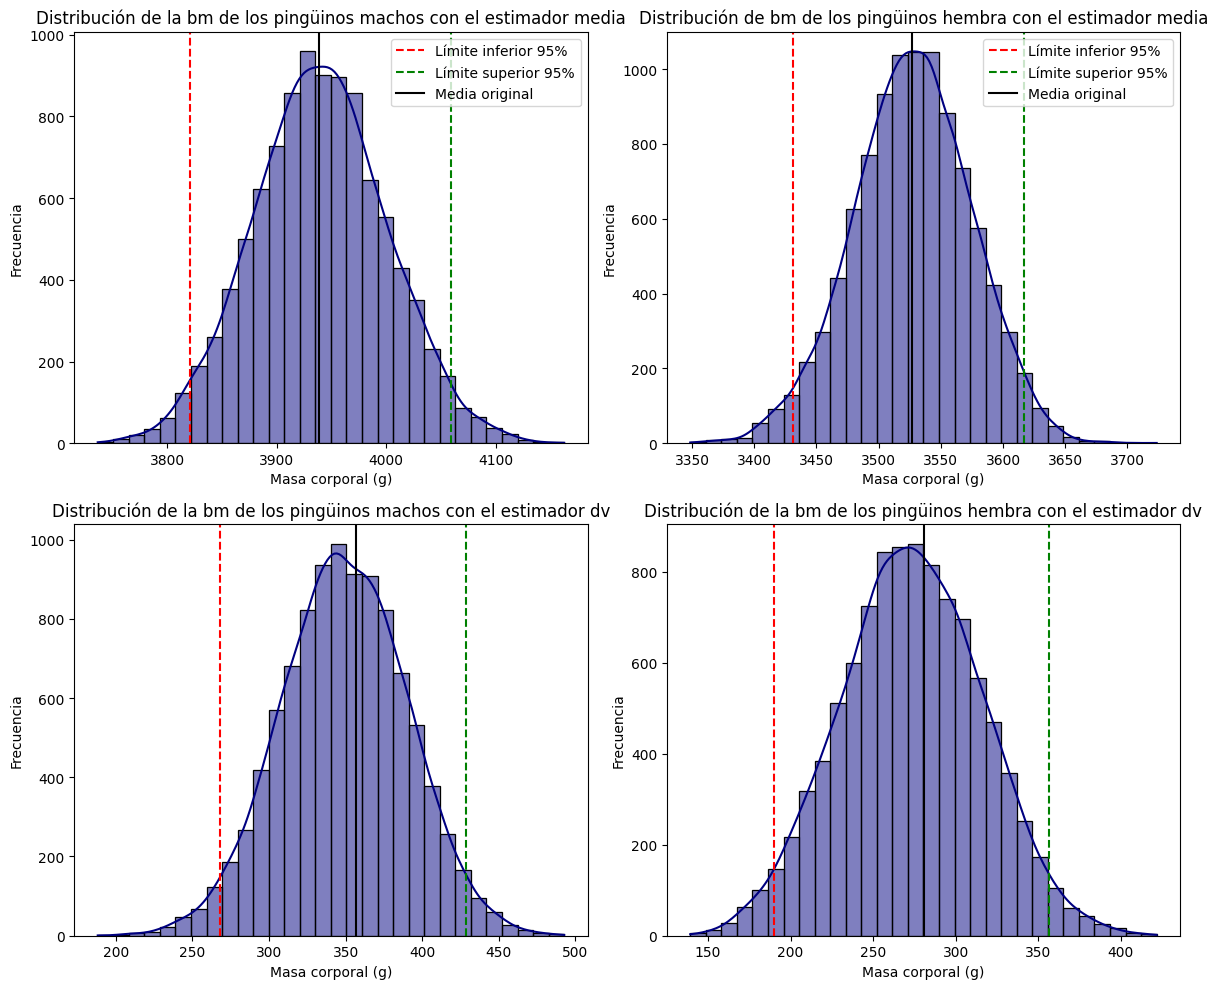

In [61]:
# Gráficos agregando los intervalos de confianza
# Graficos de la distribución de la masa corporal estimada por bootstrap de los pingüinos machos y hembras
plt.figure(figsize=(12, 10))

# Distribución de la masa corporal de los pingüinos machos con el estimador media
plt.subplot(2, 2, 1)
sns.histplot(media_m[1], kde=True, color='navy', bins=30)
plt.axvline(limite_inf_m, color='red', linestyle='--', label='Límite inferior 95%')
plt.axvline(limite_sup_m, color='green', linestyle='--', label='Límite superior 95%')
plt.axvline(bm_o_m, color='black', linestyle='-', label='Media original')
plt.title('Distribución de la bm de los pingüinos machos con el estimador media')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.legend()

# Distribución de la masa corporal de los pingüinos hembra con el estimador media
plt.subplot(2, 2, 2)
sns.histplot(media_f[1], kde=True, color='navy', bins=30)
plt.axvline(limite_inf_f, color='red', linestyle='--', label='Límite inferior 95%')
plt.axvline(limite_sup_f, color='green', linestyle='--', label='Límite superior 95%')
plt.axvline(bm_o_f, color='black', linestyle='-', label='Media original')
plt.title('Distribución de bm de los pingüinos hembra con el estimador media')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.legend()

# Distribución de la masa corporal de los pingüinos machos con el estimador dv
plt.subplot(2, 2, 3)
sns.histplot(dv_m[1], kde=True, color='navy', bins=30)
plt.axvline(limite_inf_dv_m, color='red', linestyle='--', label='Límite inferior 95%')
plt.axvline(limite_sup_dv_m, color='green', linestyle='--', label='Límite superior 95%')
plt.axvline(dv_o_m, color='black', linestyle='-', label='Desviación estándar original')
plt.title('Distribución de la bm de los pingüinos machos con el estimador dv')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

# Distribución de la masa corporal de los pingüinos hembra con el estimador dv
plt.subplot(2, 2, 4)
sns.histplot(dv_f[1], kde=True, color='navy', bins=30)
plt.axvline(limite_inf_dv_f, color='red', linestyle='--', label='Límite inferior 95%')
plt.axvline(limite_sup_dv_f, color='green', linestyle='--', label='Límite superior 95%')
plt.axvline(dv_o_f, color='black', linestyle='-', label='Desviación estándar original')
plt.title('Distribución de la bm de los pingüinos hembra con el estimador dv')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

3.1 g) ¿Qué ventajas tiene el uso de Bootstrap en comparación con los métodos tradicionales de estimación de estadísticos?

Bootstrap tiene muchísimas ventajas, entre ellas destaca la facilidad para calcular intervalos de confianza, los cuales se pueden obtener de forma directa sin depender de suposiciones sobre la distribución de los datos. Además, es muy versátil y puede aplicarse en una amplia variedad de problemas y tamaños de muestra, incluso cuando los datos no siguen una distribución conocida. Esto se debe a que se basa únicamente en el remuestreo de los datos originales, lo que lo hace fácil de implementar tanto a pequeña como a gran escala. También permite trabajar con todo tipo de estadísticos, incluso aquellos para los que no existe una fórmula analítica, lo que lo convierte en una herramienta sumamente flexible.

3.1 h) ¿Qué sucede con la estimación de algún estadístico si se varía el número de iteraciones/remuestreos bootstrap? Fundamente su respuesta con experimentos y gráficos.

Para esta ocasión ocuparemos el estadístico de la media y en los pingüinos machos de especie 'Chinstrap'

In [54]:
# Probemos iterando con distintos tamaños de muestra
n_muestras = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

# Iteramos sobre los tamaños de muestra
resultados_media_m = []
for n in n_muestras:
    # Masa corporal de los pingüinos por sexo
    estimacion_media_bootstrap_m = estimacion_media_bootstrap(body_mass_g_m, n)
    resultados_media_m.append(estimacion_media_bootstrap_m[0])
    print(f"Estimación de la media de la masa corporal de los pingüinos machos con {n} muestras: {estimacion_media_bootstrap_m[0]:.2f}")
    

Estimación de la media de la masa corporal de los pingüinos machos con 1 muestras: 3921.32
Estimación de la media de la masa corporal de los pingüinos machos con 10 muestras: 3942.72
Estimación de la media de la masa corporal de los pingüinos machos con 100 muestras: 3937.14
Estimación de la media de la masa corporal de los pingüinos machos con 1000 muestras: 3936.58
Estimación de la media de la masa corporal de los pingüinos machos con 10000 muestras: 3938.72
Estimación de la media de la masa corporal de los pingüinos machos con 100000 muestras: 3939.28
Estimación de la media de la masa corporal de los pingüinos machos con 1000000 muestras: 3938.94
Estimación de la media de la masa corporal de los pingüinos machos con 10000000 muestras: 3938.95


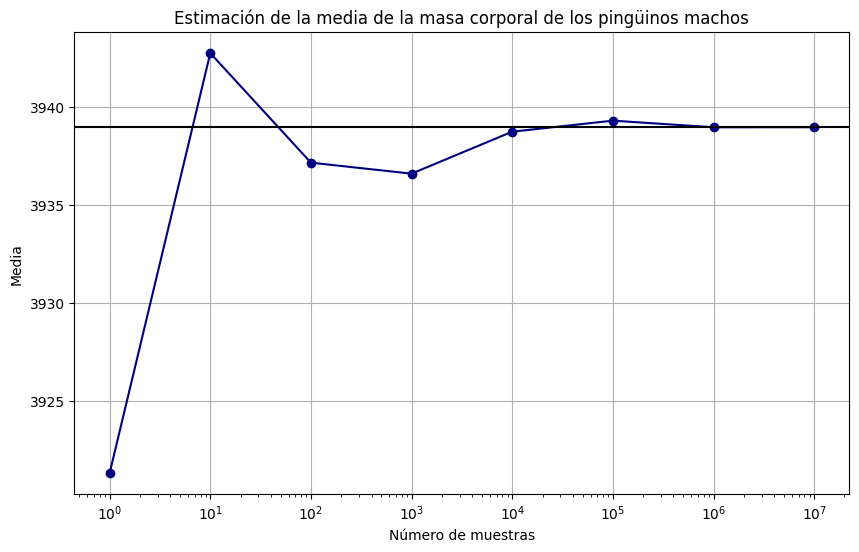

In [57]:
#Gráfico 
plt.figure(figsize=(10, 6))
plt.plot(n_muestras, resultados_media_m, marker='o', color='navy')
plt.xscale('log')
plt.title('Estimación de la media de la masa corporal de los pingüinos machos')
plt.axhline(bm_o_m, color='black', linestyle='-', label='Media original')
plt.xlabel('Número de muestras')
plt.ylabel('Media')
plt.grid(True)
plt.show()
